In [ ]:
import numpy as np
import math
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

#that's the picture used for the problem
united_states_map = mpimg.imread("tunisia roadmap-pica.png")

def show_cities(path):
    """Plot the cities as red circles."""
    if isinstance(path, dict):
        path = list(path.values())
    if isinstance(path[0][0], str):
        path = [item[1] for item in path]

    for x0, y0 in path:
        plt.plot(x0, y0, 'o', color='#f51d3a', markersize=10)  # 'ro' = red circles
        
def show_path(path, starting_city=None):
    """Plot the TSP path connecting the cities."""
    if isinstance(path, dict):
        path = list(path.values())
    if isinstance(path[0][0], str):
        path = [item[1] for item in path]

    starting_city = starting_city or path[0]
    x, y = list(zip(*path))

    plt.plot(x + x[:1], y + y[:1], '#29783f')

In [ ]:
import math
import time
from itertools import combinations

#calculate the distance between 2 cities
def distance(xy1, xy2) -> float:
    if isinstance(xy1[0], str): xy1 = xy1[1]; xy2 = xy2[1];               
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )

#calculates the total distance
def path_distance(path) -> int:
    if isinstance(path, dict):      path = list(path.values())            
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]   
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   
    ))

#time execution
def measure_execution_time(path, repetitions):
    start_time = time.perf_counter()
    for _ in range(repetitions):  
        path_distance(path)
    end_time = time.perf_counter()
    execution_time = (end_time - start_time) 
    print(f"Average execution time over {repetitions} runs: {execution_time:.6f} seconds")

def generate_distance_dict(cities):
    """Create a distance dictionary with all city pairs"""
    distances = {}
    city_names = [city[0] for city in cities]
    
    for (name1, coords1), (name2, coords2) in combinations(cities, 2):
        dist = distance(coords1, coords2)
        distances[(name1, name2)] = dist
        distances[(name2, name1)] = dist  
        
    return distances



24


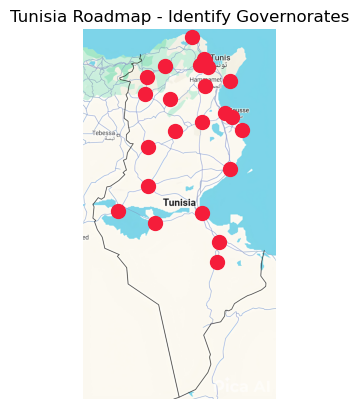

In [ ]:
#to show the map with cities' nodes 
cities = { 
    "Tunis": (1118.8, 288.4),
    "Ariana":	(1102.5, 270.5),
    "Ben Arous":	(1145.8, 348.0),
    "Mannouba":	(1065.7, 327.8),
    "Bizerte"	:(995.7, 71.0),
    "Nabeul":	(1348.2, 468.0),
    "Béja":	(747.6, 336.6),
    "Jendouba":	(579.8, 438.0),
    "Zaghouan":	(1118.8, 520.0),
    "Siliana":	(798.6, 641.0),
    "Le Kef":	(561.6, 592.0),
    "Sousse":	(1297.6, 766.5),
    "Monastir":	(1364.2, 804.3),
    "Mahdia":	(1454.3, 924.1),
    "Kasserine":	(589.6, 1079.3),
    "Sidi Bouzid":	(840.7, 932.4),
    "Kairouan":	(1089.0, 850.1),
    "Gafsa":	(589.0, 1434.0),
    "Sfax":	(1344.3, 1282.0),
    "Gabès":	(1090.6, 1683.1),
    "Médenine":	(1243.1, 1950.6),
    "Tozeur":	(319.8, 1665.3),
    "Kebili":	(654.4, 1775.0),
    "Tataouine":	(1224.1, 2134.0)    }
cities = list(sorted(cities.items()))
print(len(cities))
plt.imshow(united_states_map)
plt.title("Tunisia Roadmap - Identify Governorates")
plt.axis("off")
show_cities(cities)
plt.show()

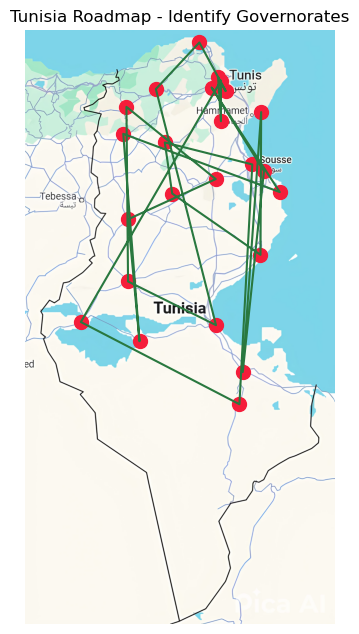

Average execution time over 1 runs: 0.000071 seconds
Average execution time over 100000 runs: 2.859296 seconds
Total distance: 18365


In [ ]:
#to show the map with cities' nodes and path
plt.figure(figsize=(4, 8))
plt.imshow(united_states_map)
plt.title("Tunisia Roadmap - Identify Governorates")
plt.axis("off")

show_cities(cities)
show_path(cities)
plt.show()  
measure_execution_time(cities, repetitions=1)
measure_execution_time(cities, repetitions=100000)
print("Total distance:",path_distance(cities))

In [78]:
distances = generate_distance_dict(cities)
print(distances)
print(len(distances))

{('Ariana', 'Ben Arous'): 88.775784986673, ('Ben Arous', 'Ariana'): 88.775784986673, ('Ariana', 'Bizerte'): 226.2885105346712, ('Bizerte', 'Ariana'): 226.2885105346712, ('Ariana', 'Béja'): 361.0030747791492, ('Béja', 'Ariana'): 361.0030747791492, ('Ariana', 'Gabès'): 1412.6501229957826, ('Gabès', 'Ariana'): 1412.6501229957826, ('Ariana', 'Gafsa'): 1271.7761202350043, ('Gafsa', 'Ariana'): 1271.7761202350043, ('Ariana', 'Jendouba'): 548.8820820540602, ('Jendouba', 'Ariana'): 548.8820820540602, ('Ariana', 'Kairouan'): 579.7571991791046, ('Kairouan', 'Ariana'): 579.7571991791046, ('Ariana', 'Kasserine'): 957.7180430586028, ('Kasserine', 'Ariana'): 957.7180430586028, ('Ariana', 'Kebili'): 1569.813320111662, ('Kebili', 'Ariana'): 1569.813320111662, ('Ariana', 'Le Kef'): 629.2337085693995, ('Le Kef', 'Ariana'): 629.2337085693995, ('Ariana', 'Mahdia'): 742.2642386643721, ('Mahdia', 'Ariana'): 742.2642386643721, ('Ariana', 'Mannouba'): 68.0994126259544, ('Mannouba', 'Ariana'): 68.0994126259544,

In [ ]:
#ant colony algorithm logic
class Ant:
    def __init__(self, start_city):
        self.path = [start_city]
        self.total_cost = 0

    #first ant's movement
    def move(self, available_cities):
        next_city = random.choice(available_cities)
        last_city = self.path[-1]
        self.path.append(next_city)
        self.total_cost += distance[(last_city, next_city)]

    def complete_trip(self):
        start_city = self.path[0]
        last_city = self.path[-1]
        self.path.append(start_city)
        self.total_cost += distance[(last_city, start_city)]

Running ACO Algorithm...


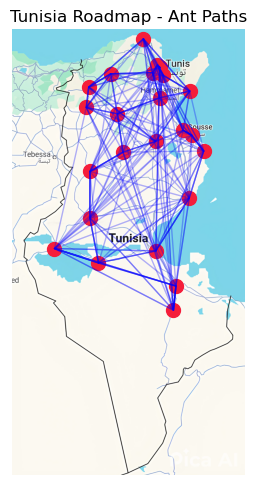

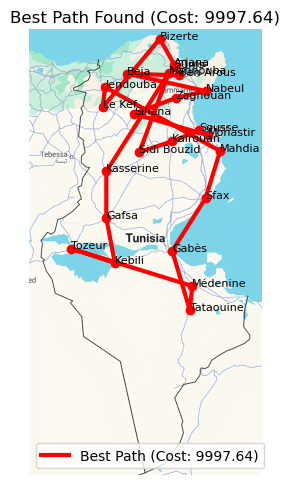


Execution Time Summary:
+--------+----------------+
| Ant #  | Time (seconds) |
+--------+----------------+
|      1 |         0.4752 |
|      2 |         0.4680 |
|      3 |         0.5503 |
|      4 |         0.3892 |
|      5 |         0.3427 |
|      6 |         0.3724 |
|      7 |         0.3088 |
|      8 |         0.3142 |
|      9 |         0.3197 |
|     10 |         0.3177 |
+--------+----------------+
| Total  |         6.2896 |
+--------+----------------+

Path Results:

Best Path Found: ['Tunis', 'Ariana', 'Ben Arous', 'Béja', 'Nabeul', 'Zaghouan', 'Siliana', 'Monastir', 'Sousse', 'Kairouan', 'Sidi Bouzid', 'Mannouba', 'Kasserine', 'Gafsa', 'Kebili', 'Tozeur', 'Médenine', 'Tataouine', 'Gabès', 'Sfax', 'Mahdia', 'Jendouba', 'Le Kef', 'Bizerte', 'Tunis']
Shortest Distance: 9997.63582705865


In [139]:
#tuple for every distance
for (city1, city2), dist in list(distances.items()):
    distances[(city2, city1)] = dist


alpha = 1  # Influence of pheromone
beta = 2   # Influence of heuristic (1/distance)
rho = 0.2  # Evaporation rate
Q = 100    # Pheromone deposit factor

# Initialize pheromone levels
pheromones = {}
for edge in distances:
    pheromones[edge] = 0.1

# calculate probability to move to next city
def calculate_probabilities(current_city, available_cities):
    probabilities = []
    denominator = 0
    for city in available_cities:
        tau = pheromones[(current_city, city)] ** alpha
        eta = (1 / distances[(current_city, city)]) ** beta
        denominator += tau * eta

    for city in available_cities:
        tau = pheromones[(current_city, city)] ** alpha
        eta = (1 / distances[(current_city, city)]) ** beta
        prob = (tau * eta) / denominator
        probabilities.append((city, prob))

    return probabilities

# Choose next city based on calculated probabilities
def select_next_city(probabilities):
    r = random.random()
    cumulative = 0.0
    for city, prob in probabilities:
        cumulative += prob
        if r <= cumulative:
            return city
    return probabilities[-1][0]

class Ant:
    def __init__(self, start_city):
        self.path = [start_city]
        self.total_cost = 0
    #ant's next movement
    def move(self, available_cities):
        last_city = self.path[-1]
        probs = calculate_probabilities(last_city, available_cities)
        epsilon = 0.1  # 10% chance to pick random city
        if random.random() < epsilon:
            next_city = random.choice(available_cities)
        else:
            next_city = select_next_city(probs)

        self.path.append(next_city)
        cities_dict = {name: coords for name, coords in cities}
        last_coords = cities_dict[last_city]
        next_coords = cities_dict[next_city]
        self.total_cost += distance(last_coords, next_coords)
        

    def complete_trip(self):
        start_city = self.path[0]
        last_city = self.path[-1]
        
        self.path.append(start_city)
        cities_dict = {name: coords for name, coords in cities}
        last_coords = cities_dict[last_city]
        start_coords = cities_dict[start_city]
        self.total_cost += distance(last_coords, start_coords)


#update pheromone after each ant completes its path 
def update_pheromones(ants):
    global pheromones
    # Evaporation
    for edge in pheromones:
        pheromones[edge] *= (1 - rho)

    # Deposit
    for ant in ants:
        contribution = Q / ant.total_cost
        for i in range(len(ant.path) - 1):
            edge = (ant.path[i], ant.path[i+1])
            pheromones[edge] += contribution
            pheromones[(edge[1], edge[0])] += contribution

def run_simple_simulation():
    # Timing variables
    total_start_time = time.time()
    ant_times = []
    
    city_names = [city[0] for city in cities]
    best_path = None
    best_cost = float('inf')
    ants = [Ant(start_city='Tunis') for _ in range(10)]  # 10 ants
    cities_dict = {name: coords for name, coords in cities}

    # Initialize plot
    fig, ax = plt.subplots(figsize=(3, 6))
    ax.imshow(united_states_map)
    ax.set_title("Tunisia Roadmap - Ant Paths")
    ax.axis("off")
    show_cities(cities)

    for ant_number, ant in enumerate(ants, 1):  
        ant_start_time = time.time()
        
        available_cities = city_names.copy()
        available_cities.remove('Tunis')

        while available_cities:
            ant.move(available_cities)
            available_cities.remove(ant.path[-1])

        ant.complete_trip()
        update_pheromones([ant])
        
        if ant.total_cost < best_cost:
            best_cost = ant.total_cost
            best_path = ant.path.copy()

        path_coords = np.array([cities_dict[city] for city in ant.path])
        ax.plot(path_coords[:, 0], path_coords[:, 1], 'b-', alpha=0.3, linewidth=1)
        plt.draw()

        # Record ant time
        ant_time = time.time() - ant_start_time
        ant_times.append(ant_time)
    print("Running ACO Algorithm...")
    # Best path plot
    plt.figure(figsize=(3, 6))
    plt.imshow(united_states_map)
    plt.title(f"Best Path Found (Cost: {best_cost:.2f})")
    plt.axis('off')
    
    # Plot cities
    for city, coords in cities:
        plt.plot(coords[0], coords[1], 'ro')
        plt.text(coords[0], coords[1], city, fontsize=8)
    
    # Plot best path
    best_path_coords = np.array([cities_dict[city] for city in best_path])
    plt.plot(best_path_coords[:, 0], best_path_coords[:, 1], 
            'r-', linewidth=3, label=f"Best Path (Cost: {best_cost:.2f})")
    
    plt.legend()
    plt.show()

    # Print timing results
    total_time = time.time() - total_start_time
    print("\nExecution Time Summary:")
    print("+--------+----------------+")
    print("| Ant #  | Time (seconds) |")
    print("+--------+----------------+")
    for i, t in enumerate(ant_times, 1):
        print(f"| {i:6} | {t:14.4f} |")
    print("+--------+----------------+")
    print(f"| Total  | {total_time:14.4f} |")
    print("+--------+----------------+")
    
    # Print path results
    print("\nPath Results:")
    #for i, ant in enumerate(ants, 1):
    #    print(f"Ant {i}: Path = {ant.path}")
    #    print(f"Total Cost = {ant.total_cost}")
    
    print(f"\nBest Path Found: {best_path}")
    print(f"Shortest Distance: {best_cost}")
    return best_path, best_cost
aco_path, aco_cost = run_simple_simulation() 

In [137]:
"This was supposed to be the code for the brute force algorithm, It works fine but since the iteration number is insanely huge i won't be running it"

#import itertools
#import time
#cities_dict = {name: coords for name, coords in cities}
#def brute_force_tsp():
#    """Calculate all possible paths and return the shortest one"""
#    city_names = [city[0] for city in cities if city[0] != 'Tunis']  # Exclude start city
#    start_city = 'Tunis'
#    min_distance = float('inf')
#    best_path = None
#    s=0
#    start_time = time.time()
#    
#    # Generate all possible permutations
#    for permutation in itertools.permutations(city_names):
#        #current_path = [start_city] + list(permutation) + [start_city]
#        #current_distance = 0
#        #
#        ## Calculate total distance
#        #for i in range(len(current_path)-1):
#        #    city1, city2 = current_path[i], current_path[i+1]
#        #    current_distance += distances.get((city1, city2), distances.get((city2, city1)))
#        #
#        #if current_distance < min_distance:
#        #    min_distance = current_distance
#        #    best_path = current_path
#        s+=1
#    
#    #execution_time = time.time() - start_time
#    #return best_path, min_distance, execution_time
#    return s
#
## Run both algorithms and compare
#def compare_algorithms():
#    
#    
#    print("\nRunning Brute Force Algorithm...")
#    print(brute_force_tsp())
#    #bf_path, bf_dist, bf_time = brute_force_tsp()
#    #
#    #print("\nAlgorithm Comparison:")
#    #print("+------------------+----------------+----------------+")
#    #print("| Algorithm        | Time (seconds) | Best Distance  |")
#    #print("+------------------+----------------+----------------+")
#    #print(f"| Brute Force     | {bf_time:14.4f} | {bf_dist:14.2f} |")
#    #print("+------------------+----------------+----------------+")
#    #
#    ## Plot brute force result for comparison
#    #plt.figure(figsize=(3, 6))
#    #plt.imshow(united_states_map)
#    #plt.title(f"Brute Force Optimal Path (Cost: {bf_dist:.2f})")
#    #plt.axis('off')
#    #
#    ## Plot cities
#    #for city, coords in cities:
#    #    plt.plot(coords[0], coords[1], 'ro')
#    #    plt.text(coords[0], coords[1], city, fontsize=8)
#    #
#    ## Plot brute force path
#    #bf_coords = np.array([cities_dict[city] for city in bf_path])
#    #plt.plot(bf_coords[:, 0], bf_coords[:, 1], 'g-', linewidth=3, label="Brute Force")
#    #plt.legend()
#    #plt.show()
#
## Run the comparison
#compare_algorithms()

"This was supposed to be the code for the brute force algorithm, It works fine but since the iteration number is insanely huge i won't be running it"

Running Hill Climbing...


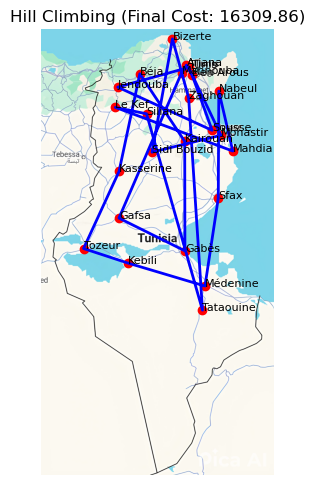


Running ACO...
Running ACO Algorithm...


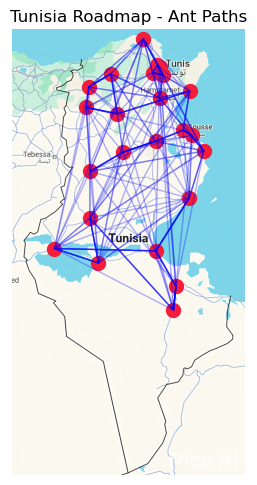

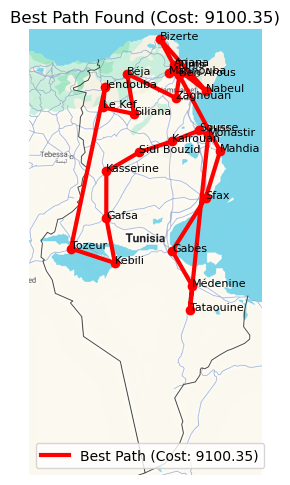


Execution Time Summary:
+--------+----------------+
| Ant #  | Time (seconds) |
+--------+----------------+
|      1 |         0.3896 |
|      2 |         0.3627 |
|      3 |         0.3647 |
|      4 |         0.4757 |
|      5 |         0.3426 |
|      6 |         0.3252 |
|      7 |         0.4309 |
|      8 |         0.3060 |
|      9 |         0.3397 |
|     10 |         0.3358 |
+--------+----------------+
| Total  |         6.8517 |
+--------+----------------+

Path Results:

Best Path Found: ['Tunis', 'Ariana', 'Mannouba', 'Ben Arous', 'Zaghouan', 'Béja', 'Siliana', 'Le Kef', 'Jendouba', 'Tozeur', 'Kebili', 'Gafsa', 'Kasserine', 'Sidi Bouzid', 'Kairouan', 'Sousse', 'Monastir', 'Tataouine', 'Médenine', 'Gabès', 'Sfax', 'Mahdia', 'Bizerte', 'Nabeul', 'Tunis']
Shortest Distance: 9100.3531976089

Algorithm Comparison:
+------------------+----------------+----------------+
| Algorithm        | Time (seconds) | Best Distance  |
+------------------+----------------+----------------+


In [ ]:
#hill climbing code and comparision with aco
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def hill_climbing_tsp(max_iterations=10):
    city_names = [city[0] for city in cities if city[0] != 'Tunis']
    current_path = ['Tunis'] + random.sample(city_names, len(city_names)) + ['Tunis']
    current_cost = calculate_path_cost(current_path)
    
    best_path = current_path.copy()
    best_cost = current_cost
    
    for iteration in range(max_iterations):
        improved = False
        
        # Generate all possible neighbors by swapping adjacent cities
        for i in range(1, len(city_names)):
            neighbor = current_path.copy() #O(n)
            # Swap adjacent cities
            j = i + 1 if i < len(city_names) else 1  
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            
            neighbor_cost = calculate_path_cost(neighbor) #O(n) (n+1)
            
            # If neighbor is better, move there and break the loop
            if neighbor_cost < current_cost:
                current_path = neighbor
                current_cost = neighbor_cost
                improved = True
                
                # Update best solution if improved
                if current_cost < best_cost:
                    best_path = current_path.copy()
                    best_cost = current_cost
                
                break  # Move to the new state immediately
        
        # If no improvement found in any neighbor, we're stuck
        if not improved:
            break
    
    # Plotting the final result
    plt.figure(figsize=(3, 6))
    plt.imshow(united_states_map)
    plt.title(f"Hill Climbing (Final Cost: {best_cost:.2f})")
    plt.axis("off")
    
    # Plot cities
    for city, coords in cities:
        plt.plot(coords[0], coords[1], 'ro')
        plt.text(coords[0], coords[1], city, fontsize=8)
    
    # Plot final best path
    path_coords = np.array([cities_dict[city] for city in best_path])
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'b-', linewidth=2)
    plt.show()
    
    return best_path, best_cost
def calculate_path_cost(path):
    """Calculate total distance of a path"""
    total = 0
    for i in range(len(path)-1):
        city1, city2 = path[i], path[i+1]
        total += distances.get((city1, city2), distances.get((city2, city1)))
    return total

# Run and compare both algorithms
def compare_algorithms():
    print("Running Hill Climbing...")
    hc_start = time.time()
    hc_path, hc_cost = hill_climbing_tsp()
    hc_time = time.time() - hc_start
    
    
    aco_start = time.time()
    aco_path, aco_cost = run_simple_simulation() 
    aco_time = time.time() - aco_start
    
    print("\nAlgorithm Comparison:")
    print("+------------------+----------------+----------------+")
    print("| Algorithm        | Time (seconds) | Best Distance  |")
    print("+------------------+----------------+----------------+")
    print(f"| Hill Climbing   | {hc_time:14.4f} | {hc_cost:14.2f} |")
    print(f"| ACO             | {aco_time:14.4f} | {aco_cost:14.2f} |")
    print("+------------------+----------------+----------------+")

# Run comparison
compare_algorithms()

In [141]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np

def simulated_annealing_tsp(max_iterations=10, initial_temp=10, cooling_rate=0.99):
    # 1. Initial random solution
    city_names = [city[0] for city in cities if city[0] != 'Tunis']
    current_path = ['Tunis'] + random.sample(city_names, len(city_names)) + ['Tunis']
    current_cost = calculate_path_cost(current_path)
    
    best_path = current_path.copy()
    best_cost = current_cost
    
    temperature = initial_temp
    
    for iteration in range(max_iterations):
        # 2. Generate a neighbor (random swap)
        neighbor = current_path.copy()
        i, j = random.sample(range(1, len(city_names) + 1), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        neighbor_cost = calculate_path_cost(neighbor)
        
        # 3. Metropolis acceptance criterion
        cost_diff = current_cost - neighbor_cost  # Lower cost is better
        if cost_diff > 0 or random.random() < math.exp(cost_diff / temperature):
            current_path = neighbor
            current_cost = neighbor_cost
            
            # Update best solution if improved
            if current_cost < best_cost:
                best_path = current_path.copy()
                best_cost = current_cost
        
        # 4. Cool down temperature
        temperature *= cooling_rate
        
        # Optional: Early stopping if temperature is too low
        if temperature < 1e-5:
            break
    
    # Plot final result
    plt.figure(figsize=(3, 6))
    plt.imshow(united_states_map)
    plt.title(f"Simulated Annealing (Cost: {best_cost:.2f})")
    plt.axis("off")
    
    # Plot cities
    for city, coords in cities:
        plt.plot(coords[0], coords[1], 'ro')
        plt.text(coords[0], coords[1], city, fontsize=8)
    
    # Plot best path
    path_coords = np.array([cities_dict[city] for city in best_path])
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'b-', linewidth=2)
    plt.show()
    
    return best_path, best_cost

Running Hill Climbing...


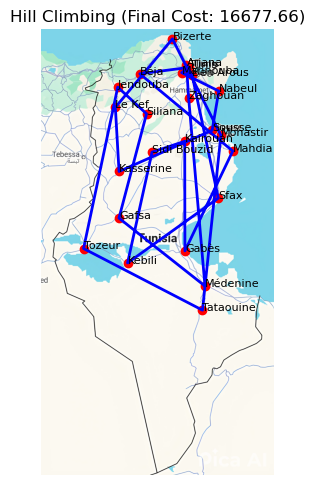


Running Simulated Annealing...


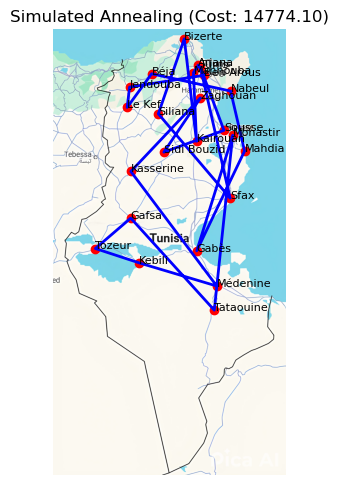

Running ACO Algorithm...


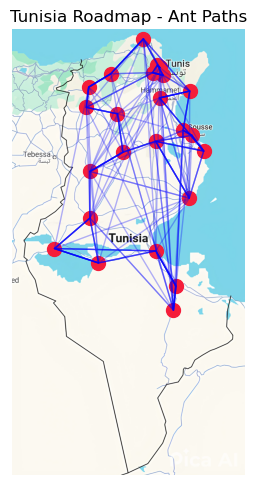

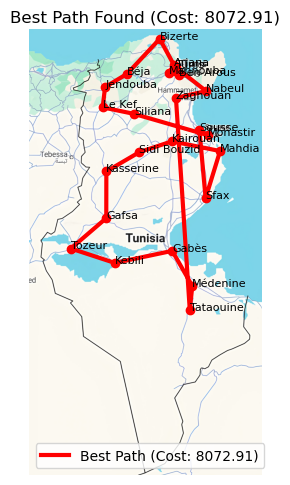


Execution Time Summary:
+--------+----------------+
| Ant #  | Time (seconds) |
+--------+----------------+
|      1 |         0.3865 |
|      2 |         0.4866 |
|      3 |         0.5918 |
|      4 |         0.5358 |
|      5 |         0.4836 |
|      6 |         0.3931 |
|      7 |         0.3668 |
|      8 |         0.3562 |
|      9 |         0.3469 |
|     10 |         0.3567 |
+--------+----------------+
| Total  |         6.8239 |
+--------+----------------+

Path Results:

Best Path Found: ['Tunis', 'Ariana', 'Mannouba', 'Ben Arous', 'Bizerte', 'Béja', 'Jendouba', 'Le Kef', 'Siliana', 'Monastir', 'Sousse', 'Sfax', 'Mahdia', 'Kairouan', 'Sidi Bouzid', 'Kasserine', 'Gafsa', 'Tozeur', 'Kebili', 'Gabès', 'Médenine', 'Tataouine', 'Zaghouan', 'Nabeul', 'Tunis']
Shortest Distance: 8072.909436567193

Algorithm Comparison:
+----------------------+----------------+----------------+
| Algorithm            | Time (seconds) | Best Distance  |
+----------------------+----------------+----

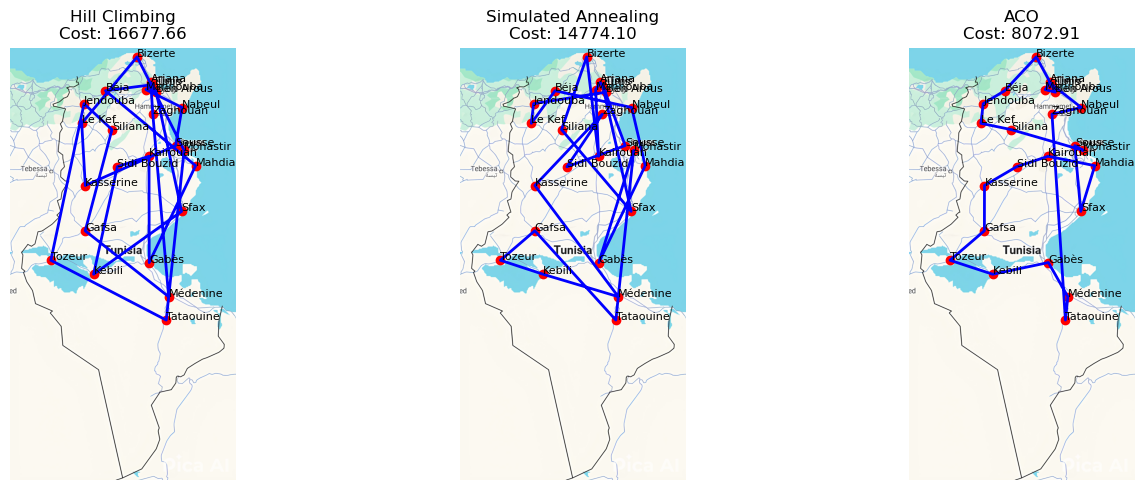

In [143]:
#code for the simulated annealing + comparing them all
def compare_algorithms():
    print("Running Hill Climbing...")
    hc_start = time.time()
    hc_path, hc_cost = hill_climbing_tsp(max_iterations=10)
    hc_time = time.time() - hc_start
    
    print("\nRunning Simulated Annealing...")
    sa_start = time.time()
    sa_path, sa_cost = simulated_annealing_tsp(max_iterations=10)
    sa_time = time.time() - sa_start
    
    
    aco_start = time.time()
    aco_path, aco_cost = run_simple_simulation()  
    aco_time = time.time() - aco_start
    
    # comparison table
    print("\nAlgorithm Comparison:")
    print("+----------------------+----------------+----------------+")
    print("| Algorithm            | Time (seconds) | Best Distance  |")
    print("+----------------------+----------------+----------------+")
    print(f"| Hill Climbing       | {hc_time:14.4f} | {hc_cost:14.2f} |")
    print(f"| Simulated Annealing | {sa_time:14.4f} | {sa_cost:14.2f} |")
    print(f"| ACO                 | {aco_time:14.4f} | {aco_cost:14.2f} |")
    print("+----------------------+----------------+----------------+")

    # Plot all results (optional)
    plt.figure(figsize=(15, 5))
    
    # Hill Climbing
    plt.subplot(1, 3, 1)
    plot_path(hc_path, "Hill Climbing", hc_cost)
    
    # Simulated Annealing
    plt.subplot(1, 3, 2)
    plot_path(sa_path, "Simulated Annealing", sa_cost)
    
    # ACO
    plt.subplot(1, 3, 3)
    plot_path(aco_path, "ACO", aco_cost)
    
    plt.tight_layout()
    plt.show()

def plot_path(path, title, cost):
    """Helper function to plot a TSP path"""
    plt.imshow(united_states_map)
    plt.title(f"{title}\nCost: {cost:.2f}")
    plt.axis("off")
    for city, coords in cities:
        plt.plot(coords[0], coords[1], 'ro')
        plt.text(coords[0], coords[1], city, fontsize=8)
    path_coords = np.array([cities_dict[city] for city in path])
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'b-', linewidth=2)

compare_algorithms()